<a href="https://colab.research.google.com/github/VictorGuui/INPE/blob/master/Atividade4_6INPE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import xarray as xr

In [54]:
import numpy as np

In [55]:
import matplotlib.pyplot as plt

In [56]:
pip install cartopy

In [60]:
import cartopy.crs as ccrs

In [59]:
import cartopy.feature as cfeature

In [58]:
pip install geopandas

In [61]:
import geopandas as gpd

In [62]:
import pandas as pd

In [63]:
import matplotlib.colors as mcolors


In [64]:
estados = gpd.read_file("/content/drive/MyDrive/BR_UF_2022.shx")

In [65]:
dset = xr.open_dataset("/content/drive/MyDrive/sst.mnmean.nc")

In [67]:
dset

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [68]:
dset_tropical = dset.sel(lat=slice(30, -30))

In [ ]:
dset_tropical

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [69]:
precipitacao = dset_tropical['sst']
# sst é algo similar ao precip pois passa os valores das variaveis time,latitude,longitude

In [70]:
precipitacao = precipitacao.sel(time=slice('1991-01-01', '2020-12-01'))

In [71]:
media_climatologica = precipitacao.groupby('time.month').mean(dim='time')

In [72]:
media_climatologica

<xarray.DataArray 'sst' (month: 12, lat: 60, lon: 360)>
array([[[18.320335, 18.341333, 18.365   , ..., 18.260332, 18.279999,
         18.300333],
        [18.706   , 18.725002, 18.747663, ..., 18.652336, 18.670666,
         18.687998],
        [19.116331, 19.133333, 19.15667 , ..., 19.073668, 19.088335,
         19.103666],
        ...,
        [22.505333, 22.306334, 22.109001, ..., 23.110332, 22.91    ,
         22.711334],
        [22.349997, 22.159668, 21.975334, ..., 22.940996, 22.753334,
         22.55933 ],
        [22.149666, 21.985003, 21.829336, ..., 22.680336, 22.516665,
         22.339668]],

       [[17.612999, 17.620665, 17.628332, ..., 17.596   , 17.601667,
         17.608334],
        [18.045666, 18.05433 , 18.064331, ..., 18.022665, 18.031334,
         18.037333],
        [18.506998, 18.516336, 18.528666, ..., 18.480661, 18.488333,
         18.497997],
...
        [19.322666, 19.15433 , 19.001333, ..., 19.799662, 19.664001,
         19.507336],
        [19.113997, 18.952332, 18.802666, ..., 19.545998, 19.431334,
         19.290335],
        [18.877333, 18.732666, 18.599333, ..., 19.244667, 19.152998,
         19.033665]],

       [[19.486332, 19.551666, 19.618   , ..., 19.292667, 19.35633 ,
         19.421999],
        [19.842335, 19.905   , 19.969667, ..., 19.660004, 19.721334,
         19.781   ],
        [20.231667, 20.288002, 20.352333, ..., 20.060001, 20.117   ,
         20.174335],
        ...,
        [20.894665, 20.707996, 20.528664, ..., 21.464666, 21.282   ,
         21.094002],
        [20.72633 , 20.54833 , 20.378998, ..., 21.280664, 21.11033 ,
         20.930998],
        [20.547665, 20.392336, 20.248999, ..., 21.036333, 20.89267 ,
         20.732996]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 29.5 28.5 27.5 26.5 25.5 ... -26.5 -27.5 -28.5 -29.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/14)
    long_name:                Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:     [-5. 40.]
    actual_range:             [-1.7999996 35.56862  ]
    units:                    degC
    precision:                2
    least_significant_digit:  2
    ...                       ...
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Weekly Mean
    standard_name:            sea_surface_temperature
    cell_methods:             time: mean (monthly from weekly values interpol...
    valid_range:              [-500 4000]

In [74]:
dset_1998 = dset_tropical.sel(time=slice("1998-01-01", "1998-12-31"))
dset_2022 = dset_tropical.sel(time=slice("2022-01-01", "2022-12-31"))

In [ ]:
dset_1998

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1998-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [ ]:
dset_2022

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [75]:
anomalia_1998 = dset_1998['sst'] - media_climatologica
anomalia_2022 = dset_2022['sst'] - media_climatologica

In [76]:
anomalia_1998

<xarray.DataArray 'sst' (time: 12, lat: 60, lon: 360, month: 12)>
array([[[[ 0.44966507,  1.1570015 ,  1.0923328 , ..., -3.836666  ,
          -2.3203316 , -0.7163315 ],
         [ 0.4386654 ,  1.1593342 ,  1.1049976 , ..., -3.9820004 ,
          -2.4270039 , -0.7716675 ],
         [ 0.42499924,  1.1616669 ,  1.1189995 , ..., -4.128332  ,
          -2.532999  , -0.828001  ],
         ...,
         [ 0.4896679 ,  1.1539993 ,  1.0639992 , ..., -3.3883305 ,
          -1.987997  , -0.5426674 ],
         [ 0.48000145,  1.1583328 ,  1.0776653 , ..., -3.5356712 ,
          -2.0953274 , -0.59633064],
         [ 0.4596672 ,  1.1516666 ,  1.0803337 , ..., -3.6903362 ,
          -2.2126675 , -0.66199875]],

        [[ 0.43400002,  1.0943336 ,  1.0106678 , ..., -3.6349983 ,
          -2.2353363 , -0.70233536],
         [ 0.42499733,  1.0956688 ,  1.0206661 , ..., -3.772997  ,
          -2.337     , -0.75500107],
         [ 0.41233635,  1.0956688 ,  1.0293331 , ..., -3.911995  ,
          -2.4389973 , -0.8096676 ],
...
         [-1.9409962 , -2.5273323 , -2.4019985 , ...,  2.6123333 ,
           1.4540024 , -0.28066444],
         [-1.9933338 , -2.5880013 , -2.472332  , ...,  2.4346695 ,
           1.3286667 , -0.35033035],
         [-2.019331  , -2.6223335 , -2.5133324 , ...,  2.3066654 ,
           1.2496643 , -0.39099884]],

        [[-1.8196659 , -2.4373302 , -2.3216686 , ...,  2.5166664 ,
           1.4526672 , -0.21766472],
         [-1.7650032 , -2.3803349 , -2.2720032 , ...,  2.531334  ,
           1.4873333 , -0.17233658],
         [-1.699337  , -2.314333  , -2.2016659 , ...,  2.5666656 ,
           1.5306664 , -0.11899948],
         ...,
         [-1.6903362 , -2.2790012 , -2.1243305 , ...,  2.932331  ,
           1.7453327 , -0.04633331],
         [-1.7566643 , -2.3493347 , -2.2026672 , ...,  2.7426662 ,
           1.6070023 , -0.13266945],
         [-1.8196678 , -2.4176693 , -2.2836666 , ...,  2.5703354 ,
           1.4863358 , -0.21299553]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 29.5 28.5 27.5 26.5 25.5 ... -26.5 -27.5 -28.5 -29.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1998-12-01
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [77]:
anomalia_2022

<xarray.DataArray 'sst' (time: 12, lat: 60, lon: 360, month: 12)>
array([[[[ 3.96633148e-02,  7.46999741e-01,  6.82331085e-01, ...,
          -4.24666786e+00, -2.73033333e+00, -1.12633324e+00],
         [ 8.66699219e-03,  7.29335785e-01,  6.74999237e-01, ...,
          -4.41199875e+00, -2.85700226e+00, -1.20166588e+00],
         [-1.49993896e-02,  7.21668243e-01,  6.79000854e-01, ...,
          -4.56833076e+00, -2.97299767e+00, -1.26799965e+00],
         ...,
         [ 9.96665955e-02,  7.63998032e-01,  6.73997879e-01, ...,
          -3.77833176e+00, -2.37799835e+00, -9.32668686e-01],
         [ 7.00016022e-02,  7.48332977e-01,  6.67665482e-01, ...,
          -3.94567108e+00, -2.50532722e+00, -1.00633049e+00],
         [ 5.96656799e-02,  7.51665115e-01,  6.80332184e-01, ...,
          -4.09033775e+00, -2.61266899e+00, -1.06200027e+00]],

        [[ 4.40006256e-02,  7.04334259e-01,  6.20668411e-01, ...,
          -4.02499771e+00, -2.62533569e+00, -1.09233475e+00],
         [ 2.49977112e-02,  6.95669174e-01,  6.20666504e-01, ...,
          -4.17299652e+00, -2.73699951e+00, -1.15500069e+00],
         [ 2.33650208e-03,  6.85668945e-01,  6.19333267e-01, ...,
          -4.32199478e+00, -2.84899712e+00, -1.21966743e+00],
...
           3.02233315e+00,  1.86400223e+00,  1.29335403e-01],
         [-1.42333412e+00, -2.01800156e+00, -1.90233231e+00, ...,
           3.00466919e+00,  1.89866638e+00,  2.19669342e-01],
         [-1.30932999e+00, -1.91233253e+00, -1.80333138e+00, ...,
           3.01666641e+00,  1.95966530e+00,  3.19002151e-01]],

        [[-1.21966553e+00, -1.83732986e+00, -1.72166824e+00, ...,
           3.11666679e+00,  2.05266762e+00,  3.82335663e-01],
         [-1.14500237e+00, -1.76033401e+00, -1.65200233e+00, ...,
           3.15133476e+00,  2.10733414e+00,  4.47664261e-01],
         [-1.04933739e+00, -1.66433334e+00, -1.55166626e+00, ...,
           3.21666527e+00,  2.18066597e+00,  5.31000137e-01],
         ...,
         [-1.45033646e+00, -2.03900146e+00, -1.88433075e+00, ...,
           3.17233086e+00,  1.98533249e+00,  1.93666458e-01],
         [-1.36666489e+00, -1.95933533e+00, -1.81266785e+00, ...,
           3.13266563e+00,  1.99700165e+00,  2.57329941e-01],
         [-1.27966881e+00, -1.87767029e+00, -1.74366760e+00, ...,
           3.11033440e+00,  2.02633476e+00,  3.27003479e-01]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 29.5 28.5 27.5 26.5 25.5 ... -26.5 -27.5 -28.5 -29.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

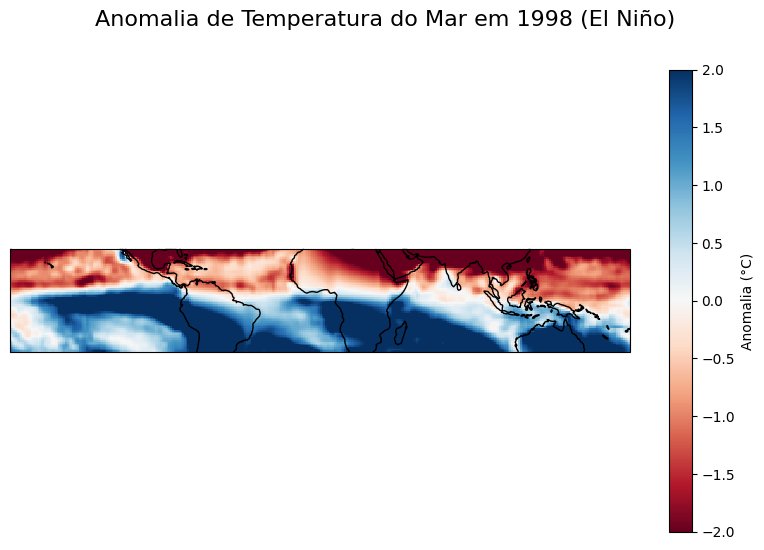

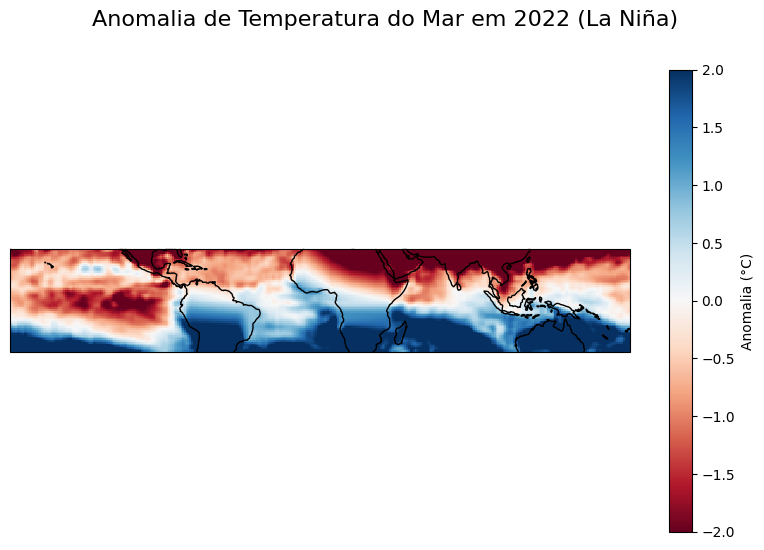

In [91]:
# Função para plotar mapa de anomalia anual
def plot_annual_map(data, title):
    # Pegando as coordenadas e os dados
    lon = data.lon
    lat = data.lat

    # Calculando a média anual (sem transpor)
    MediaDasAnomalias = data.mean(dim='month')

    # Configurando o subplot
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(title, fontsize=16)

    # Plotando o mapa de anomalia anual
    pcm = ax.pcolormesh(lon, lat, MediaDasAnomalias[0, :, :], cmap='RdBu', vmin=-2, vmax=2, transform=ccrs.PlateCarree())
    ax.coastlines()

    # Adicionando a barra de cores
    fig.colorbar(pcm, ax=ax, orientation='vertical', label='Anomalia (°C)')

    plt.show()

# Plotando mapa de anomalia anual para 1998
plot_annual_map(anomalia_1998, 'Anomalia de Temperatura do Mar em 1998 (El Niño)')

# Plotando mapa de anomalia anual para 2022
plot_annual_map(anomalia_2022, 'Anomalia de Temperatura do Mar em 2022 (La Niña)')


 - Na função para plotar o mapa

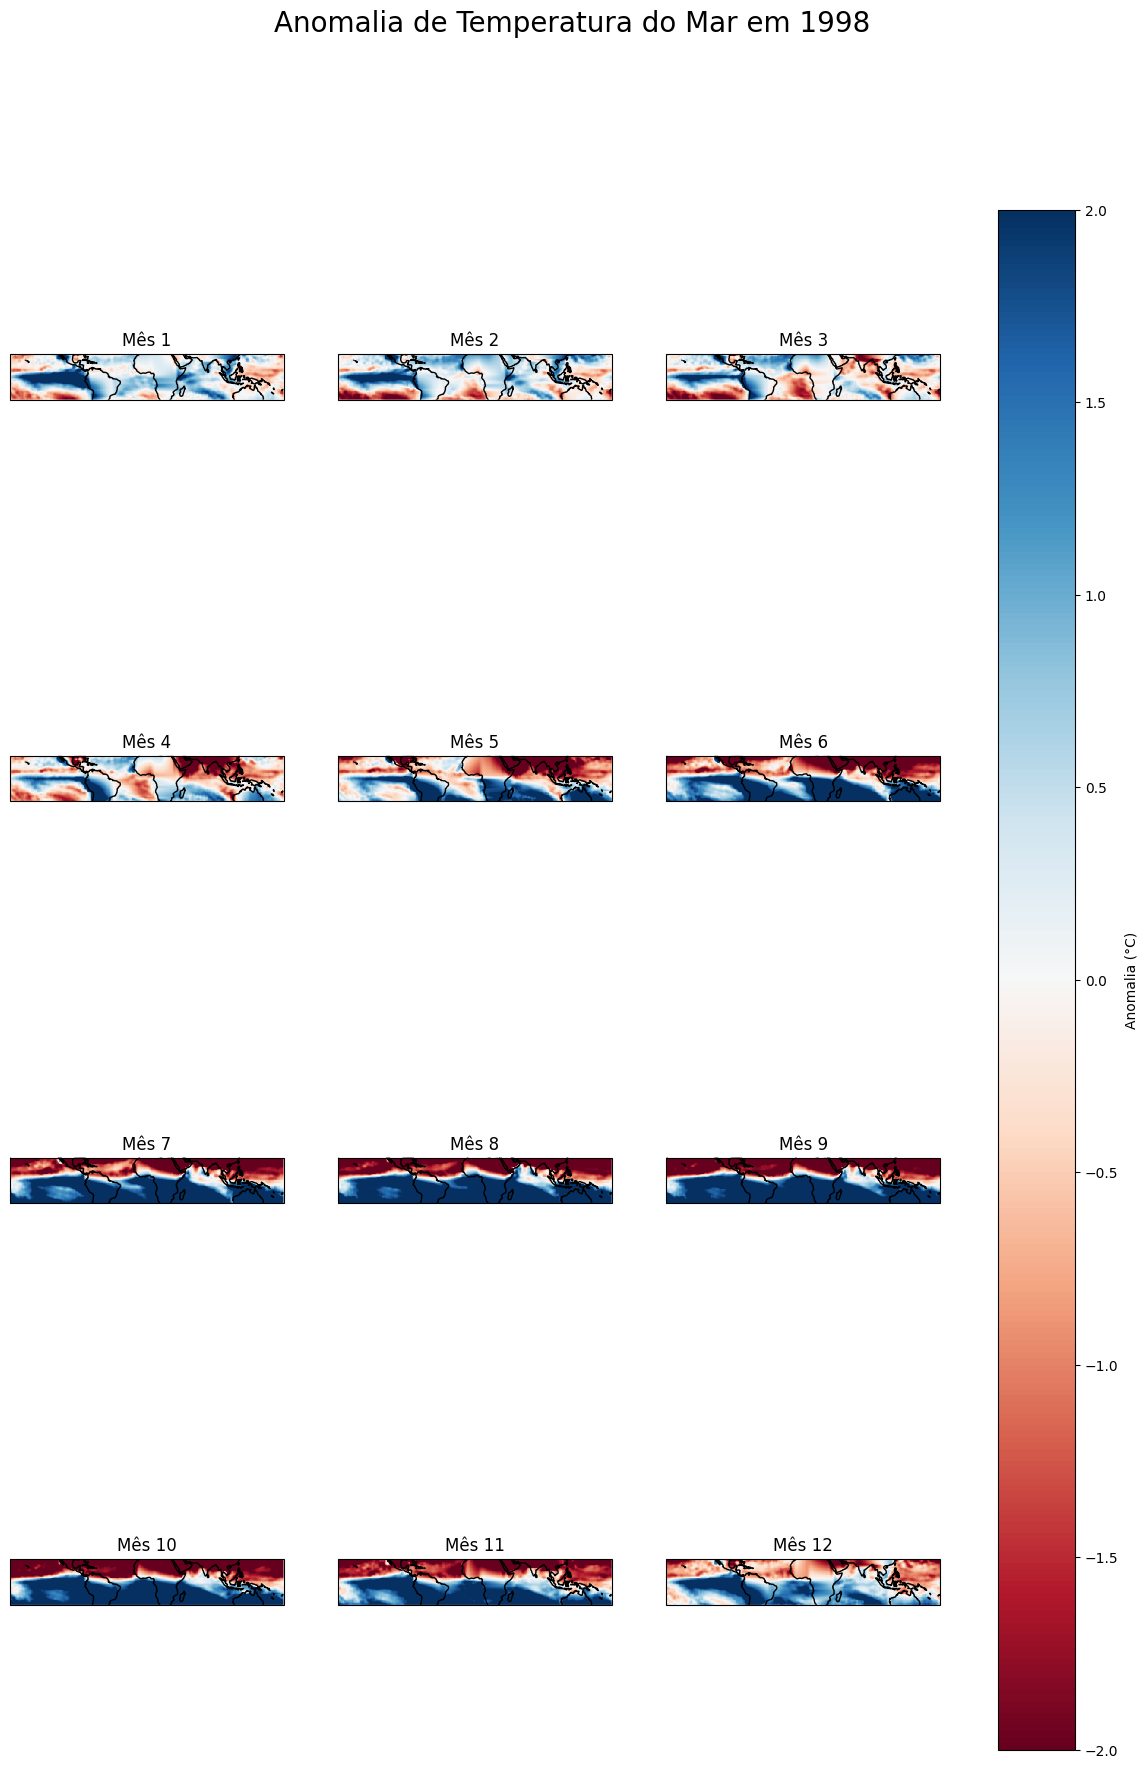

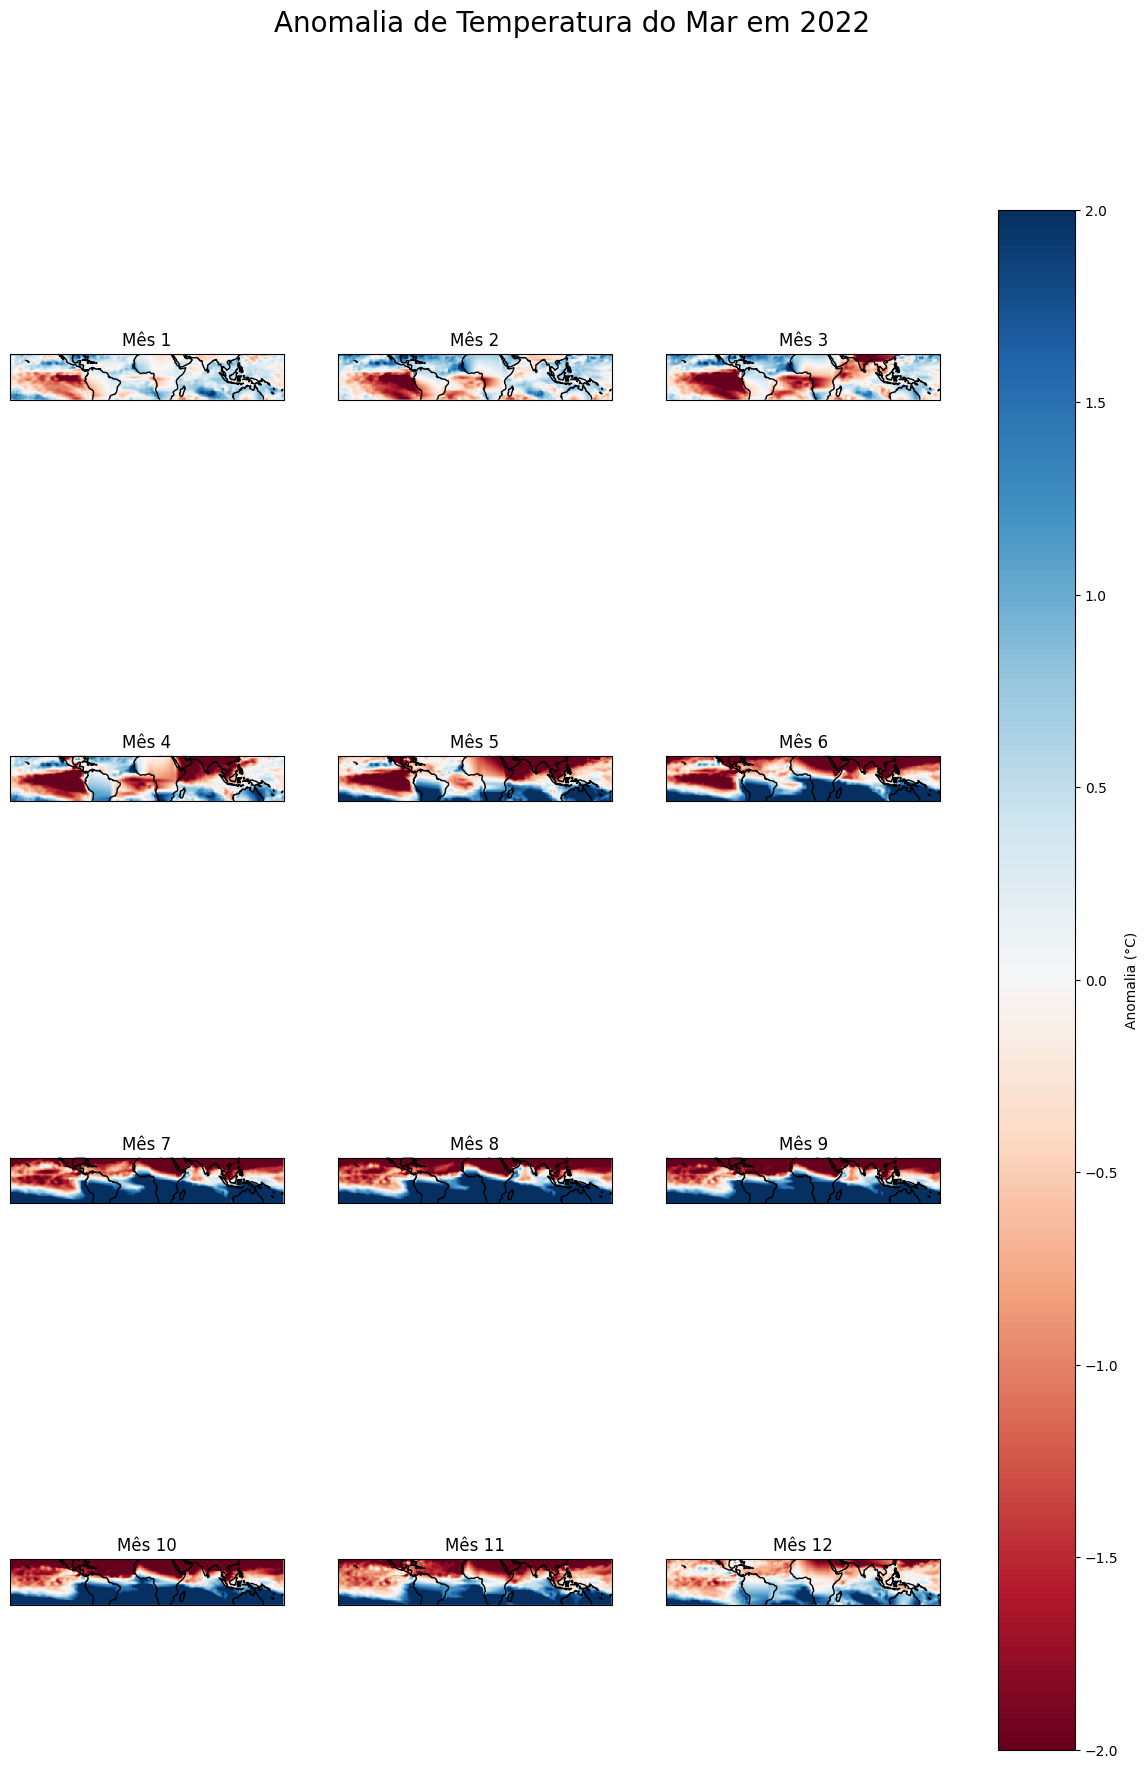

In [ ]:
# Função para plotar mapa de anomalia
def plot_map(data, title):
    # Pegando as coordenadas e os dados
    lon = data.lon
    lat = data.lat

    # Configurando a grade do subplot com base no número de meses
    num_months = data.sizes['month']
    num_cols = 3
    num_rows = int(np.ceil(num_months / num_cols))

    # Criando subplots para cada mês
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows),
                             subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(title, fontsize=20)

    # Flattening the axes array, caso o número de meses seja menor que 12
    axes = axes.flatten()

    # Iterando sobre os meses
    for i in range(num_months):
        ax = axes[i]
        ax.coastlines()
        pcm = ax.pcolormesh(lon, lat, data[:, :, i], cmap='RdBu', vmin=-2, vmax=2, transform=ccrs.PlateCarree())
        ax.set_title(f'Mês {i + 1}')

    # Adicionando a barra de cores
    fig.colorbar(pcm, ax=axes, orientation='vertical', label='Anomalia (°C)')

    # Removendo subplots não utilizados (se houver)
    for i in range(num_months, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.show()

# Plotando mapa de anomalia para 1998
plot_map(anomalia_1998, 'Anomalia de Temperatura do Mar em 1998')

# Plotando mapa de anomalia para 2022
plot_map(anomalia_2022, 'Anomalia de Temperatura do Mar em 2022')


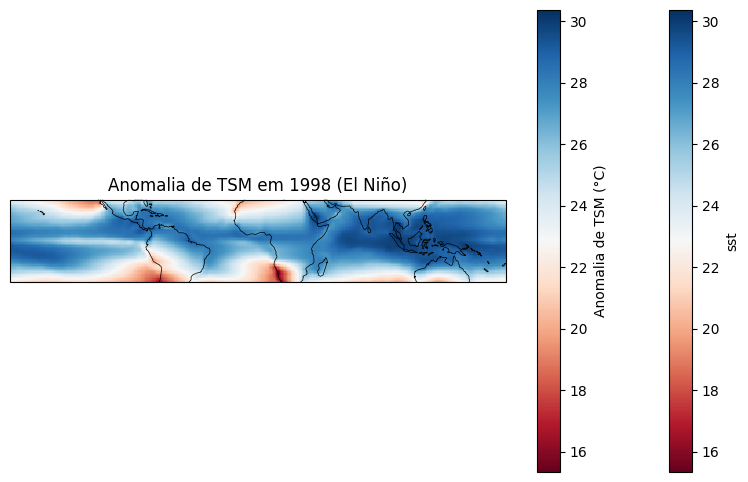

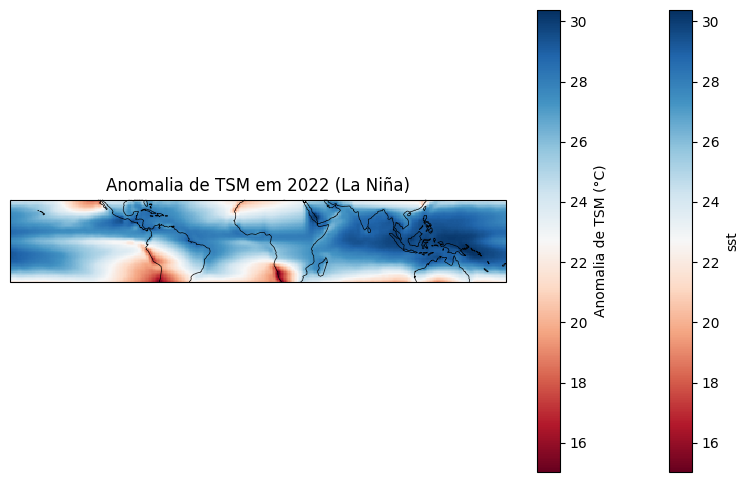

In [ ]:
# Função para plotar um mapa
def plot_map(data_array, title):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.5)

    # Média ao longo da dimensão do tempo
    mean_data = data_array.mean(dim='time')

    # Plotar a anomalia média
    mappable = mean_data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu')

    # Adicionar a barra de cores
    plt.colorbar(mappable, label='Anomalia de TSM (°C)')

    plt.title(title)
    plt.show()

# Plotar os mapas para 1998 e 2022
plot_map(dset_1998.sst, 'Anomalia de TSM em 1998 (El Niño)')
plot_map(dset_2022.sst, 'Anomalia de TSM em 2022 (La Niña)')

